In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [186]:
def bootstrap_std_dev(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.std()

def bootstrap_mean(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.mean()

def reject_outliers(data, m = 20.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    # print(s)
    return data[s<m]



c="all"
# df = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_good_policy")
# df_no_outliers = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_good_policy")
# df_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_bad_policy")
# df_no_outliers_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_bad_policy")

# df = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_good_policy")
# df_no_outliers = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_good_policy_no_outliers")
# df_bad = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_bad_policy")
# df_no_outliers_bad = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_bad_policy_no_outliers")


# df = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_good_coverage")
# df_no_outliers = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_good_coverage_no_outliers")
# df_bad = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_bad_coverage")
# df_no_outliers_bad = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_bad_coverage")
c='2'

suffix=''
folder="parquets/concept_experiments/overlap_pdis"
folder2="parquets/concept_experiments/overlap_pdis"
df = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps02{suffix}")
df_no_outliers = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps02{suffix}_no_outliers")
df_bad = pd.read_parquet(f"{folder2}/ope_estimates_c{c}_eps05{suffix}")
df_no_outliers_bad = pd.read_parquet(f"{folder2}/ope_estimates_c{c}_eps05{suffix}_no_outliers")

# print(df_bad)

# ---REJECT OUTLIERS---
for d in [100, 300, 500, 700, 900]:
    df_bad[f"{d}_vanilla"] = reject_outliers(df_bad[f"{d}_vanilla"])
    df_bad[f"{d}_concepts"] = reject_outliers(df_bad[f"{d}_concepts"])
    df[f"{d}_vanilla"] = reject_outliers(df[f"{d}_vanilla"])
    df[f"{d}_concepts"] = reject_outliers(df[f"{d}_concepts"])



#---BOOTSTRAP SAMPLING---
df_bootstrapped_std = pd.concat([bootstrap_std_dev(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_bad_bootstrapped_std = pd.concat([bootstrap_std_dev(df_bad) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bad_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers_bad) for i in range (1000)], axis=1).T.describe()

df_bootstrapped_mean = pd.concat([bootstrap_mean(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_mean= pd.concat([bootstrap_mean(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_bad_bootstrapped_mean = pd.concat([bootstrap_mean(df_bad) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bad_bootstrapped_mean = pd.concat([bootstrap_mean(df_no_outliers_bad) for i in range (1000)], axis=1).T.describe()

on_policy = -477 # -339 -227 -477
on_policy_bad_coverage = -477 # -339 -227 -477

df_stats = df.describe()
df_no_outliers_stats = df_no_outliers.describe()
df_stats_bad = df_bad.describe()
df_no_outliers_stats_bad = df_no_outliers_bad.describe()

print(df_stats)
print(df_no_outliers_stats)
# print(df_bootstrapped_std)
# print(df_bootstrapped_std.loc["std"].filter(like="vanilla"))

x = np.array([100, 300, 500, 700, 900])

       100_vanilla  100_concepts  300_vanilla  300_concepts  500_vanilla  \
count   100.000000    100.000000   100.000000    100.000000   100.000000   
mean   -467.253746   -444.123125  -445.848294   -441.067680  -444.454194   
std     109.726845     52.161353    36.285269     22.288724    35.558507   
min   -1055.521265   -718.693294  -628.636836   -509.841288  -667.352922   
25%    -484.577130   -464.649848  -457.717109   -454.799067  -461.882652   
50%    -446.769226   -435.510527  -442.894703   -441.814175  -440.295517   
75%    -413.775840   -416.026973  -422.136576   -430.898956  -425.908846   
max    -338.885832   -340.880956  -384.995821   -382.001349  -384.617266   

       500_concepts  700_vanilla  700_concepts  900_vanilla  900_concepts  
count    100.000000   100.000000    100.000000   100.000000    100.000000  
mean    -441.865614  -447.941403   -440.609317  -445.396314   -439.104512  
std       18.551755    32.120153     14.513013    25.253002     13.664343  
min     -49

In [187]:
colors_light = ["mediumturquoise", "orangered","limegreen", "palevioletred", "violet",  "orangered", "plum","lightsteelblue", "greenyellow", "violet"]
colors_dark = ["dodgerblue" , "gold", "forestgreen", "red", "darkviolet", "gold", "blueviolet" , "darkslategrey", "olive", "darkviolet"]

concepts_color = colors_light[2] #"limegreen" mediumturquoise orangered violet palevioletred
concepts_color_bad = colors_dark[2] #"forestgreen" dodgerblue gold darkviolet red
vanilla_color = "lightsalmon"
vanilla_color_bad = "saddlebrown"

kmeans_comparison = False

if kmeans_comparison:
    pdis_label=r'IS Opt $\epsilon$=0.2'
    cpdis_label=r'CIS Opt $\epsilon$=0.2'
    pdis_label_2=r'IS kmeans $\epsilon$=0.2'
    cpdis_label_2=r'CIS kmeans $\epsilon$=0.2'
else:
    pdis_label=r'PDIS $\epsilon$=0.2'
    cpdis_label=r'CPDIS $\epsilon$=0.2'
    pdis_label_2=r'PDIS $\epsilon$=0.5'
    cpdis_label_2=r'CPDIS $\epsilon$=0.5'

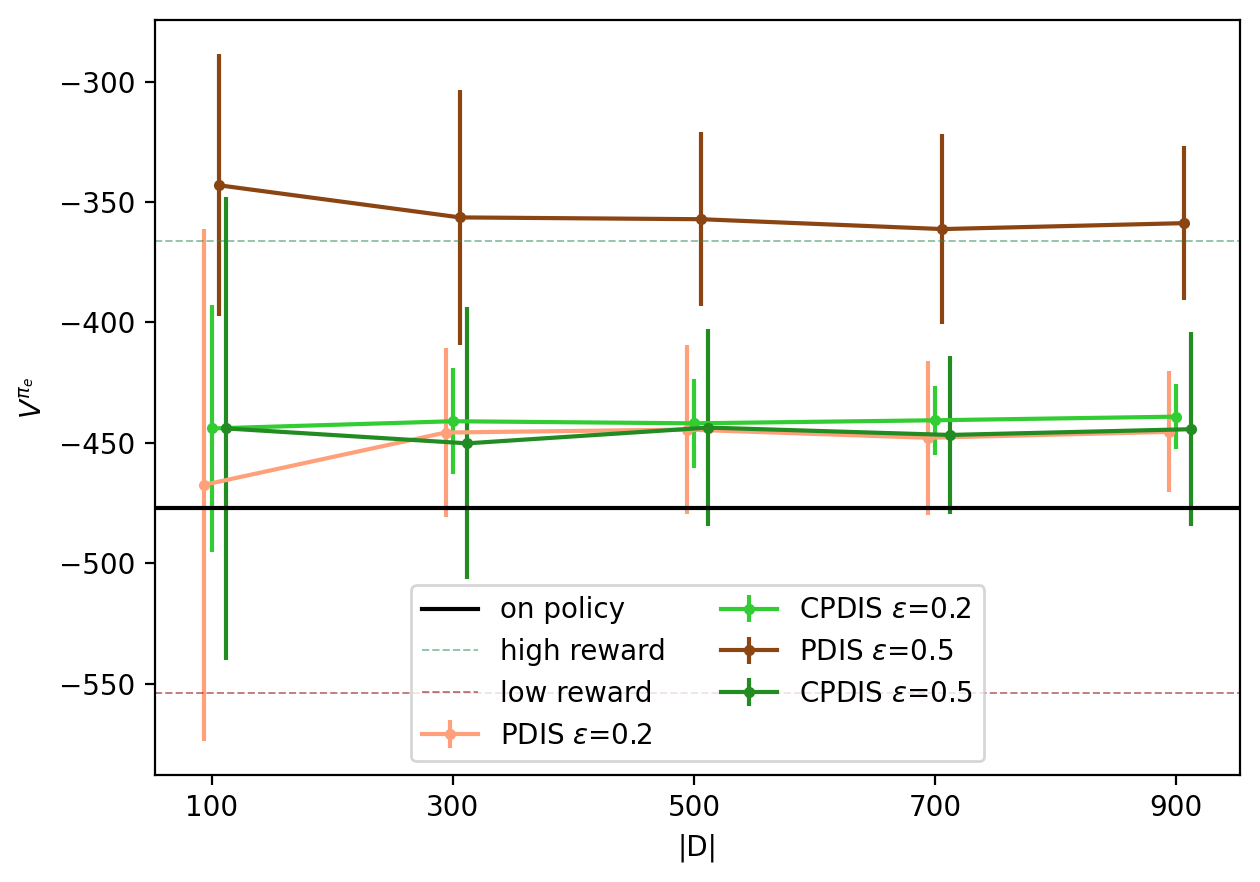

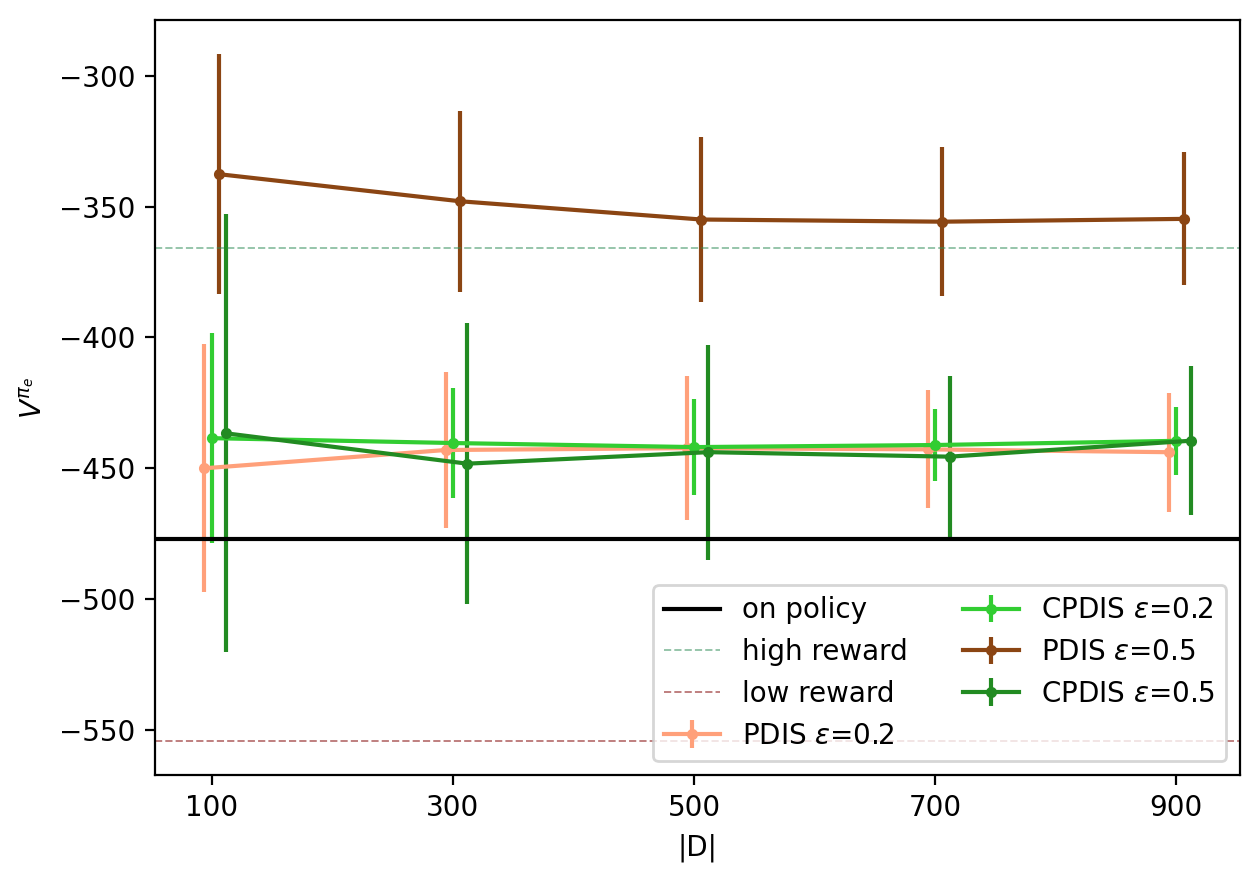

In [192]:
mean_estimates_vanilla = df_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts = df_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla = df_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts = df_bootstrapped_std.loc["mean"].filter(like="concepts")


mean_estimates_vanilla_bad = df_bad_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_bad = df_bad_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_bad = df_bad_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_bad = df_bad_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["mean"].filter(like="concepts")

#Windy, more concepts
indicative_rewards = [(-251,-406),(-170,-275),(-366,-554)]

a_high_reward, a_low_reward = indicative_rewards[2]


fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)

plt.errorbar(x-6, mean_estimates_vanilla.to_list() , yerr=std_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts.to_list() , yerr=std_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mean_estimates_vanilla_bad.to_list() , yerr=std_vanilla_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, mean_estimates_concepts_bad.to_list() , yerr=std_concepts_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.axhline(on_policy, label="on policy", color="black")
plt.axhline(a_high_reward, label="high reward", color="seagreen", alpha=0.5, linestyle="--", linewidth=0.7)
plt.axhline(a_low_reward, label="low reward", color="maroon", alpha=0.5, linestyle="--", linewidth=0.7)
plt.legend(loc="lower center", ncols=2)
plt.ylabel(r"$V^{\pi_e}$")
plt.xlabel("|D|")
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x-6, mean_estimates_vanilla_no_outliers.to_list() , yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts_no_outliers.to_list() , yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mean_estimates_vanilla_no_outliers_bad.to_list() , yerr=std_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, mean_estimates_concepts_no_outliers_bad.to_list() , yerr=std_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.axhline(on_policy, label="on policy", color="black")
plt.axhline(a_high_reward, label="high reward", color="seagreen", alpha=0.5, linestyle="--", linewidth=0.7)
plt.axhline(a_low_reward, label="low reward", color="maroon", alpha=0.5, linestyle="--", linewidth=0.7)
plt.xlabel("|D|")
plt.xticks(x)


plt.ylabel(r"$V^{\pi_e}$")
plt.legend(loc="lower right", ncols=2)
plt.show()

## Bias Plots

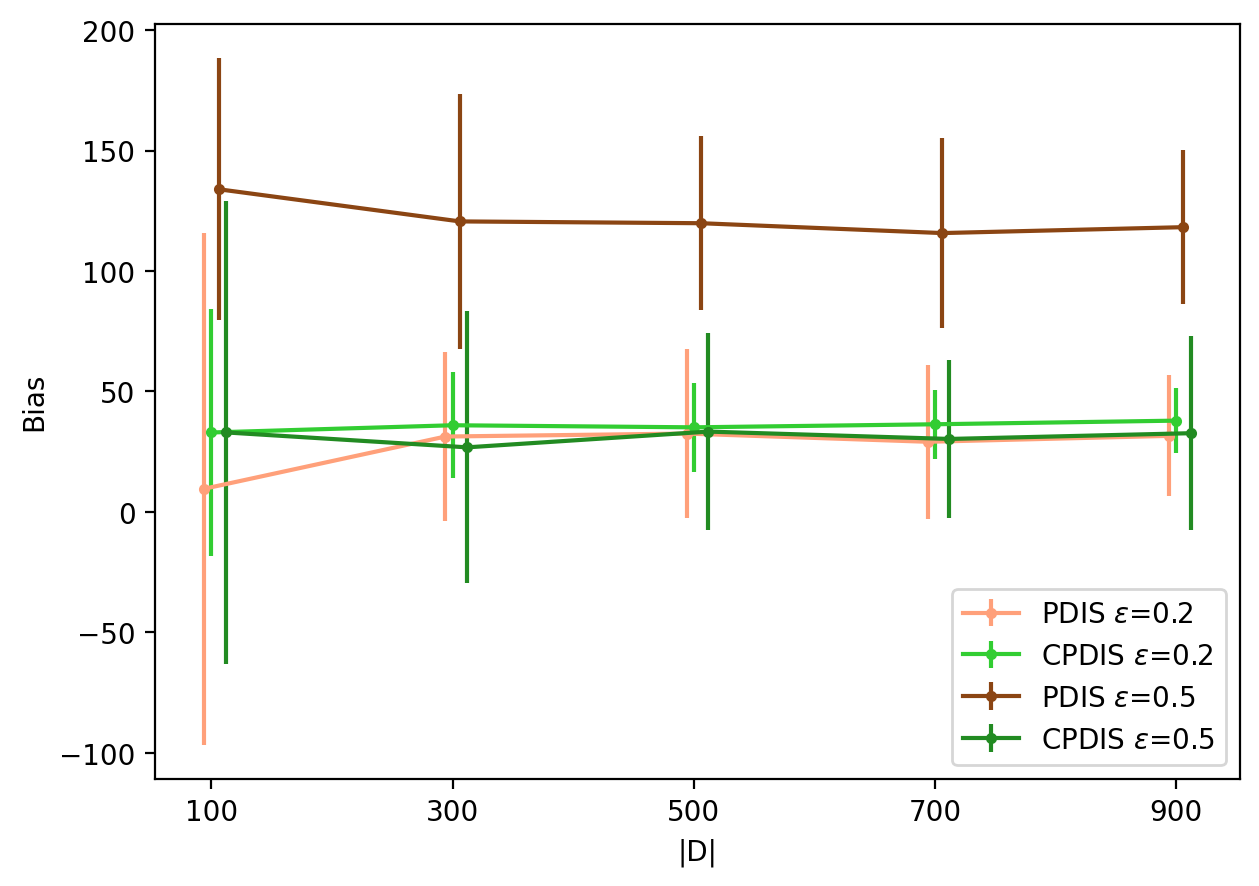

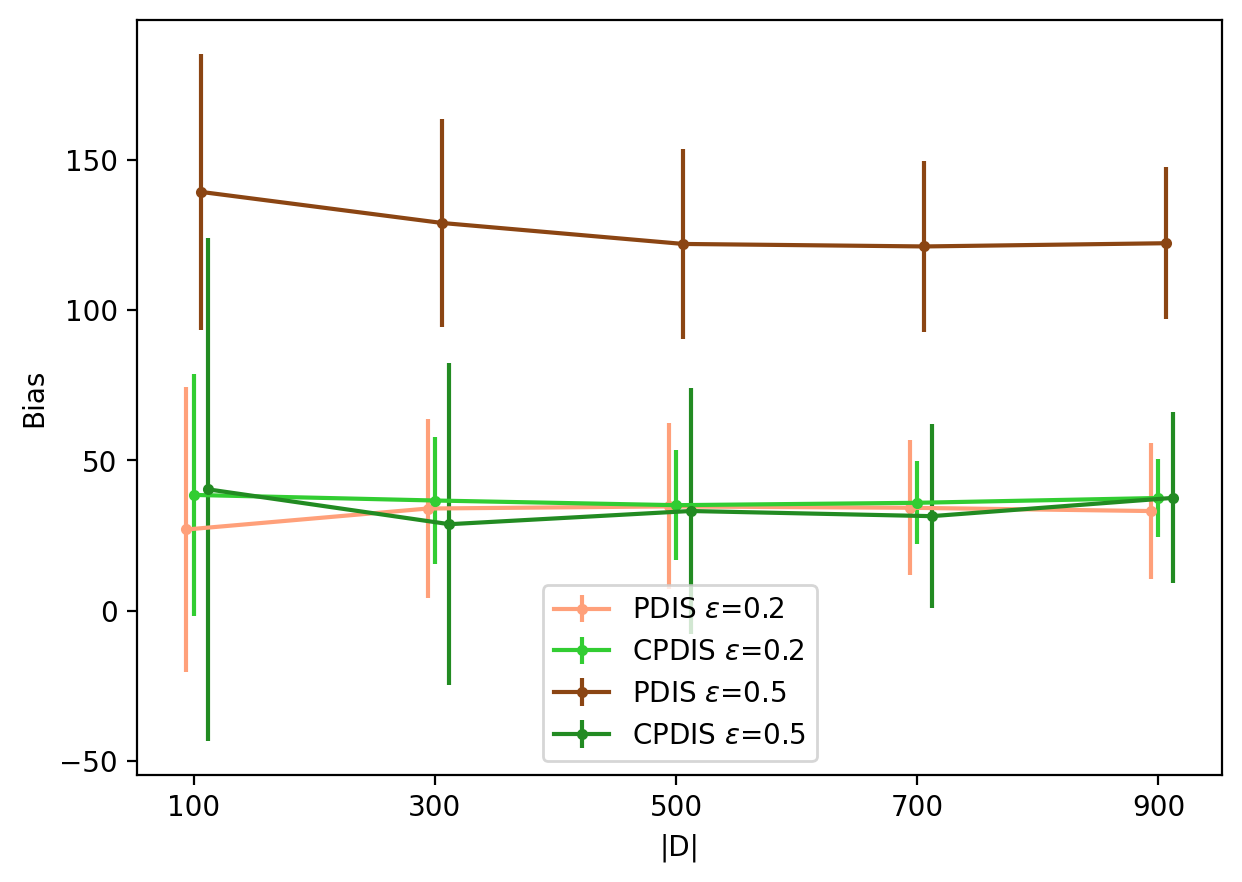

In [189]:

bias_vanilla = mean_estimates_vanilla - on_policy
bias_concepts = mean_estimates_concepts - on_policy
bias_vanilla_no_outliers = mean_estimates_vanilla_no_outliers - on_policy
bias_concepts_no_outliers = mean_estimates_concepts_no_outliers - on_policy

bias_vanilla_bad = mean_estimates_vanilla_bad - on_policy
bias_concepts_bad = mean_estimates_concepts_bad - on_policy
bias_vanilla_no_outliers_bad = mean_estimates_vanilla_no_outliers_bad - on_policy
bias_concepts_no_outliers_bad = mean_estimates_concepts_no_outliers_bad - on_policy



fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)
plt.errorbar(x-6, bias_vanilla, label=pdis_label, yerr=std_vanilla.to_list(), color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts, label=cpdis_label, yerr=std_concepts.to_list(), color=concepts_color, marker=".")
plt.errorbar(x+6, bias_vanilla_bad, label=pdis_label_2, yerr=std_vanilla_bad.to_list(), color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, bias_concepts_bad, label=cpdis_label_2, yerr=std_concepts_bad.to_list(), color=concepts_color_bad, marker=".")
plt.xlabel("|D|")
plt.ylabel("Bias") 
plt.xticks(x)
plt.legend(loc="lower right")

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x-6, bias_vanilla_no_outliers, yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts_no_outliers, yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, bias_vanilla_no_outliers_bad, yerr=std_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, bias_concepts_no_outliers_bad, yerr=std_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.ylabel("Bias")
plt.xlabel("|D|")
plt.xticks(x)

plt.legend(loc="lower center")
plt.show()


## Variance Plots

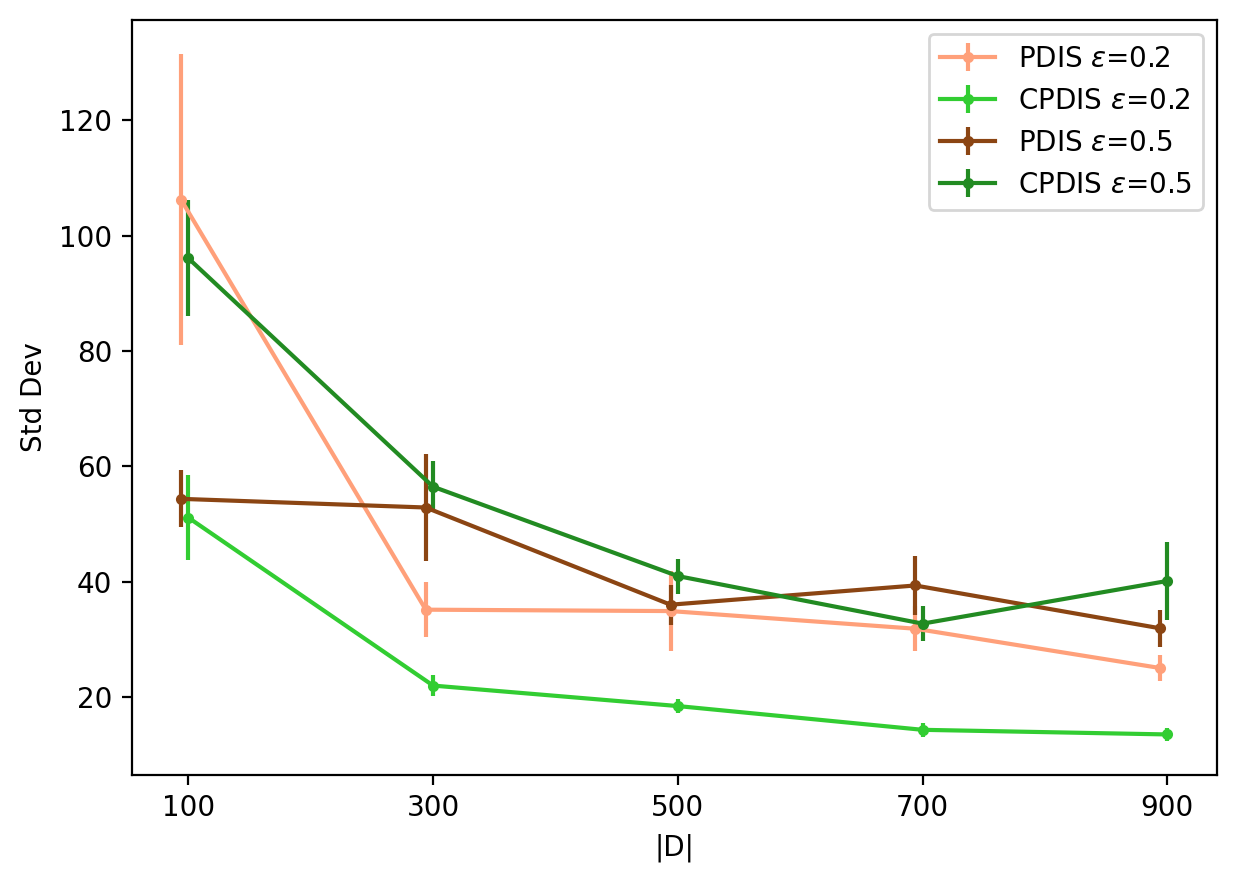

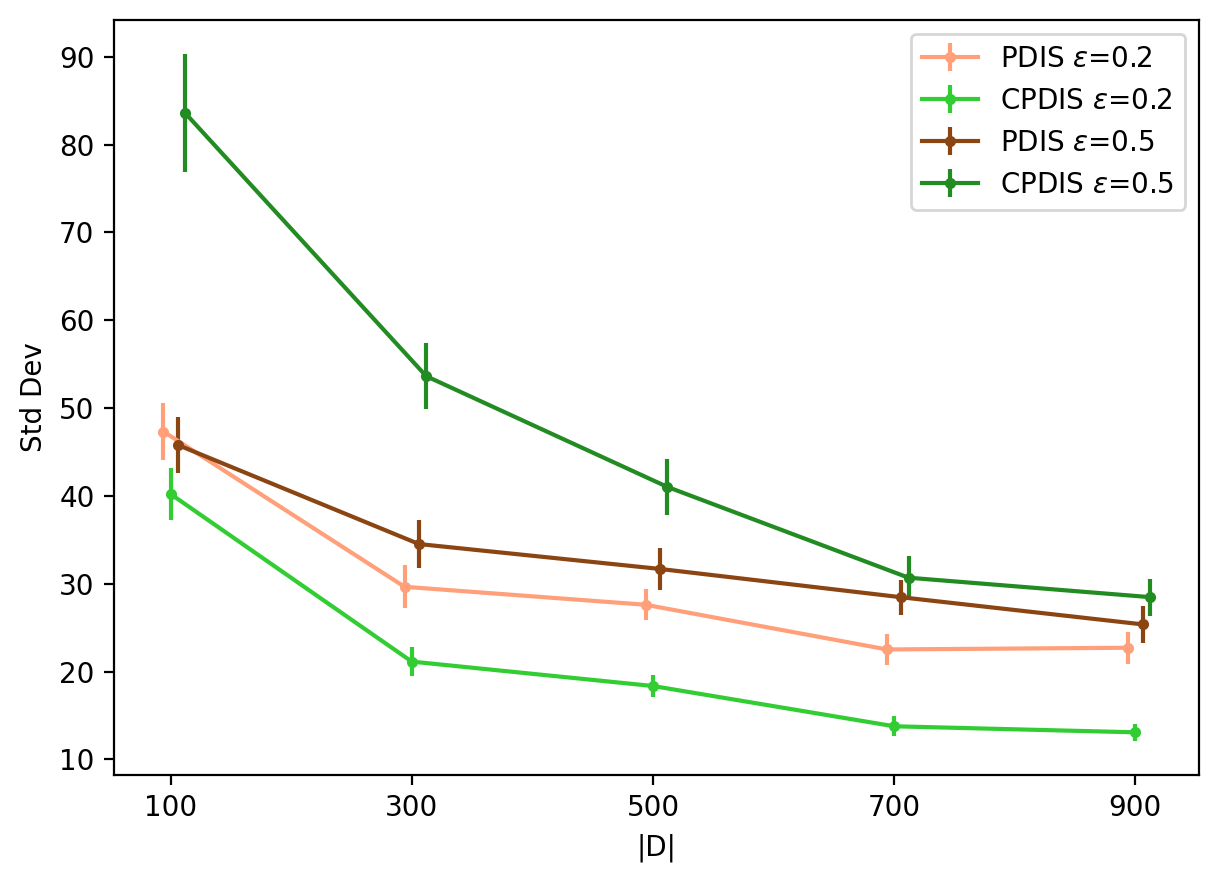

In [190]:
var_vanilla = std_vanilla**2
var_concepts = std_concepts**2
var_vanilla_no_outliers = std_vanilla_no_outliers**2
var_concepts_no_outliers = std_concepts_no_outliers**2
var_vanilla_bad = std_vanilla_bad**2
var_concepts_bad = std_concepts_bad**2
var_vanilla_no_outliers_bad = std_vanilla_no_outliers_bad**2
var_concepts_no_outliers_bad = std_concepts_no_outliers_bad**2

#Error bars of standard deviation from bootstrap sampling
err_vanilla = df_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts = df_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_bad = df_bad_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_bad = df_bad_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["std"].filter(like="concepts")


fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)

plt.errorbar(x-6, std_vanilla, yerr=err_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts, yerr=err_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x-6, std_vanilla_bad, yerr=err_vanilla_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad,  marker=".")
plt.errorbar(x, std_concepts_bad, yerr=err_concepts_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.legend(loc="upper right")
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x-6, std_vanilla_no_outliers, yerr=err_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts_no_outliers, yerr=err_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, std_vanilla_no_outliers_bad, yerr=err_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad,  marker=".")
plt.errorbar(x+12, std_concepts_no_outliers_bad, yerr=err_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.xticks(x)


plt.legend(loc="upper right")
plt.show()


## MSE Plots

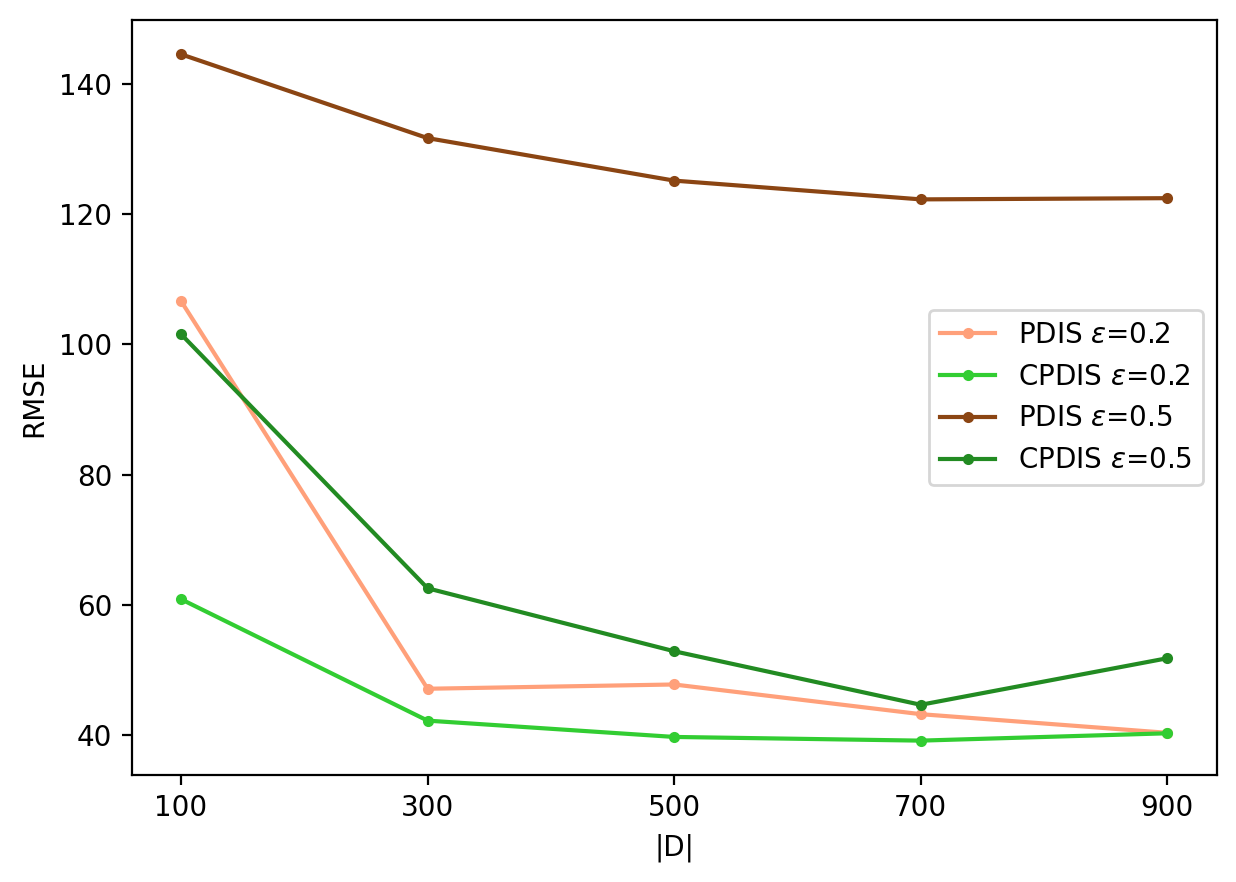

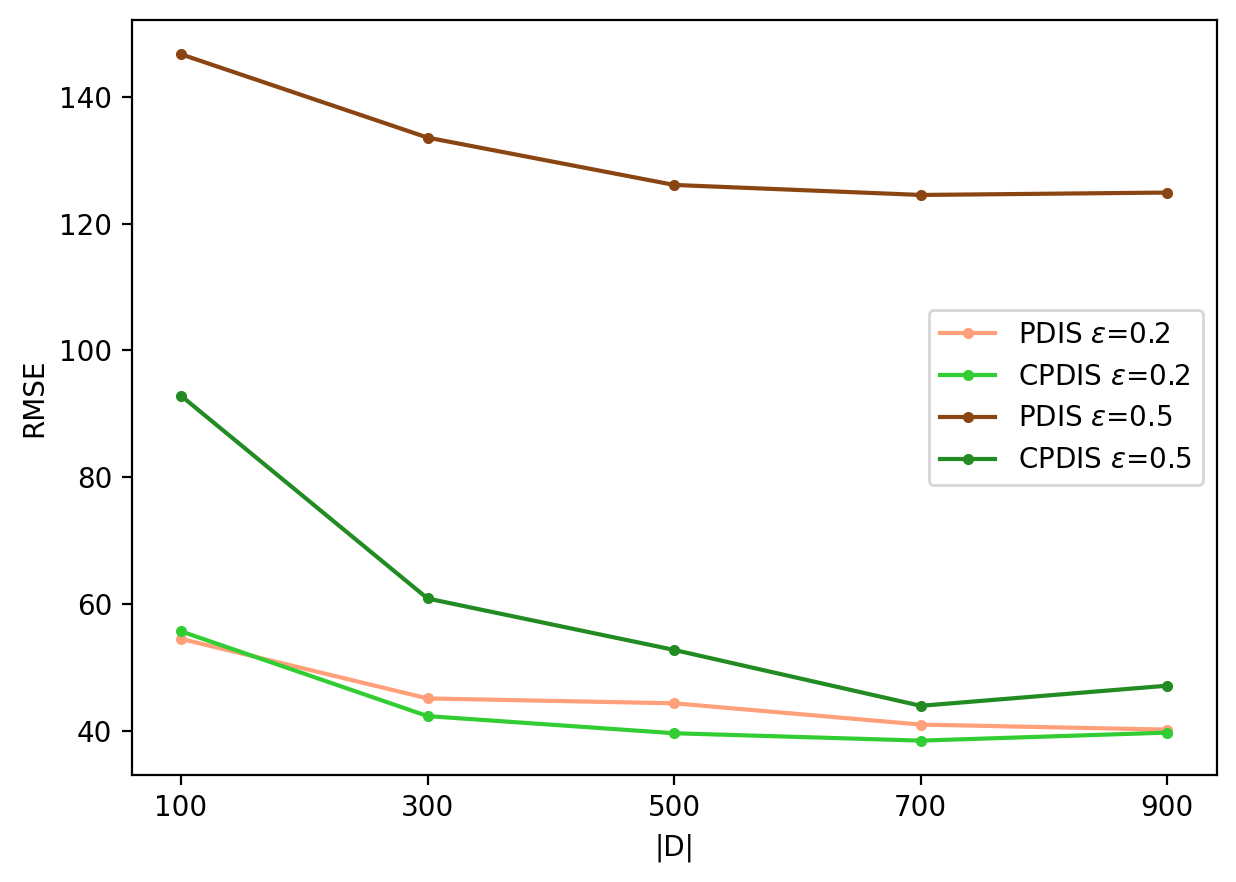

In [191]:
mse_vanilla = np.sqrt(var_vanilla + bias_vanilla**2)
mse_concepts = np.sqrt(var_concepts + bias_concepts**2)
mse_vanilla_no_outliers =np.sqrt(var_vanilla_no_outliers + bias_vanilla_no_outliers**2)
mse_concepts_no_outliers = np.sqrt(var_concepts_no_outliers + bias_concepts_no_outliers**2)

mse_vanilla_bad = np.sqrt(var_vanilla_bad + bias_vanilla_bad**2)
mse_concepts_bad = np.sqrt(var_concepts_bad + bias_concepts_bad**2)
mse_vanilla_no_outliers_bad = np.sqrt(var_vanilla_no_outliers_bad + bias_vanilla_no_outliers_bad**2)
mse_concepts_no_outliers_bad = np.sqrt(var_concepts_no_outliers_bad + bias_concepts_no_outliers_bad**2)

fig = plt.figure(figsize=(7,5), dpi=200)

plt.plot(x, mse_vanilla, label=pdis_label, color=vanilla_color, marker=".")
plt.plot(x, mse_concepts, label=cpdis_label, color=concepts_color, marker=".")
plt.plot(x, mse_vanilla_bad, label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.plot(x, mse_concepts_bad, label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.xlabel("|D|")
plt.ylabel("RMSE")
plt.xticks(x)
plt.legend()

fig = plt.figure(figsize=(7,5), dpi=200)
plt.plot(x, mse_vanilla_no_outliers, label=pdis_label, color=vanilla_color, marker=".")
plt.plot(x, mse_concepts_no_outliers, label=cpdis_label, color=concepts_color, marker=".")
plt.plot(x, mse_vanilla_no_outliers_bad, label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.plot(x, mse_concepts_no_outliers_bad, label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.xlabel("|D|")
plt.ylabel("RMSE")
plt.xticks(x)


plt.legend(loc="center right")
plt.show()